## Enunciado da Questão

Considere uma rede deep learning  convolutiva  (treinada)  - CNN aplicada  à classificação  de  padrões  em  imagens.  A  base  de  dados  considerada  é  a  CIFAR-10  (pesquise). A referida  base  de  dados  consiste  de  60  mil  imagens  coloridas  de  32x32  pixels,  com  50  mil para  treino  e  10  mil  para  teste.  As  imagens  estão  divididas  em  10  classes,  a  saber:  avião, navio,  caminhão,  automóvel,  sapo,  pássaro,  cachorro,  gato,  cavalo  e  cervo.  Cada  imagem possui apenas um dos objetos da classe de interesse, podendo estar parcialmente obstruído por outros objetos que não pertençam a esse conjunto. Apresente os resultados da classificação em uma matriz de confusão.  

Obs. Pesquise e utilize uma rede convolutiva já treinada

### 1. Load do Modelo e Dados de Teste

Imagens de treinamento e teste estão na pasta data/cifar-10-python/cifar-10-batches-py na forma de dicionário. Para essa atividade só será utilizado os dados de teste para predição

Já os modelos estão disponíveis aqui: https://www.kaggle.com/datasets/firuzjuraev/trained-models-for-cifar10-dataset/data

|Model|Accuracy|
|---|---|
|ResNet 50|95.30%|
|DenseNet 169|95.10%|
|VGG 19|93.18%|
|MobileNet V2|94.20%|
|GoogLeNet|95.01%|
|Inception V3|94.77%|
|Xception|93.49%|

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("firuzjuraev/trained-models-for-cifar10-dataset")

print("Path to dataset files:", path)

/home/esdras-daniel/Documentos/UFRN/2025.2/ML/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/esdras-daniel/.cache/kagglehub/datasets/firuzjuraev/trained-models-for-cifar10-dataset/versions/1


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transform

# Arquitetura dos modelos
from models.resnet_models import ResNet50

In [3]:
trained_models_directory = '/home/esdras-daniel/.cache/kagglehub/datasets/firuzjuraev/trained-models-for-cifar10-dataset/versions/1/trained_models_cifar10'
model_file_name = "resnet50_cifar10_lr01.pth" 

path = os.path.join(trained_models_directory, model_file_name)

clf_model = ResNet50()

clf_model.load_state_dict(torch.load(path, map_location=torch.device('cpu'))['net'])

<All keys matched successfully>

In [4]:
import pickle

# Dados de Teste
with open('../data/cifar-10-python/cifar-10-batches-py/test_batch', 'rb') as fo:
    dict_test = pickle.load(fo, encoding='bytes')

In [16]:
X = torch.tensor(
    dict_test[b'data'].reshape((10000, 3, 32, 32))/255,
    dtype=torch.float32
)[:200]

y = torch.tensor(dict_test[b'labels'][:200])

#X/255
outputs = clf_model(X)
y_pred = nn.functional.softmax(outputs).argmax(dim=1)

/tmp/ipykernel_35961/3501344253.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  y_pred = nn.functional.softmax(outputs).argmax(dim=1)


              precision    recall  f1-score   support

           0    0.94737   0.90000   0.92308        20
           1    1.00000   1.00000   1.00000        14
           2    0.94737   0.85714   0.90000        21
           3    0.85000   0.89474   0.87179        19
           4    1.00000   0.93333   0.96552        15
           5    0.77273   0.94444   0.85000        18
           6    0.96000   0.92308   0.94118        26
           7    1.00000   1.00000   1.00000        18
           8    1.00000   0.96429   0.98182        28
           9    0.95455   1.00000   0.97674        21

    accuracy                        0.94000       200
   macro avg    0.94320   0.94170   0.94101       200
weighted avg    0.94453   0.94000   0.94091       200



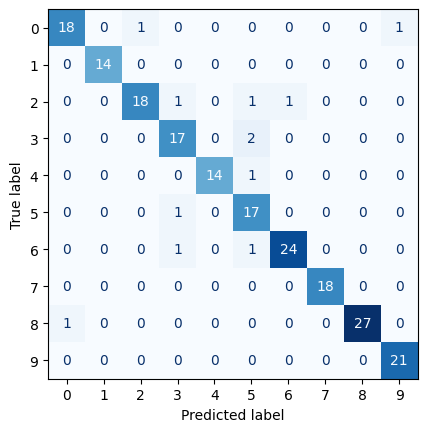

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print(classification_report(y, y_pred, digits=5))

ConfusionMatrixDisplay.from_predictions(y, y_pred, cmap='Blues', colorbar=False)
plt.show()